In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv("C:\\Users\\saran\\Downloads\\seattle-weather.csv")

In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<Axes: xlabel='precipitation', ylabel='Count'>

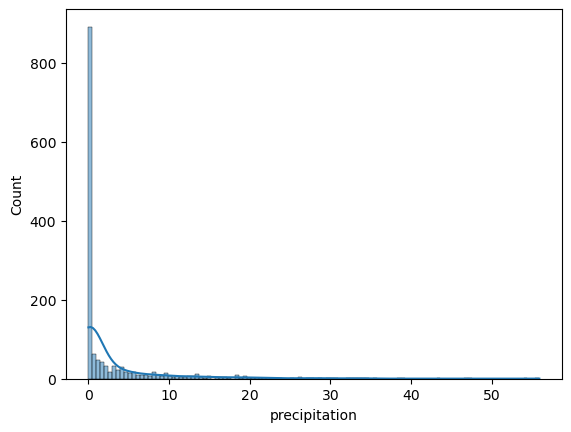

In [6]:
sns.histplot(df['precipitation'], kde=True)

In [7]:
df['precipitation'].describe()


count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [8]:
for col in ['temp_max','temp_min','wind']:
    df[f'{col}_d'] = pd.qcut(df[col], q=2, labels=['low', 'high'])


In [9]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_d,temp_min_d,wind_d
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,low,low,high
1,2012-01-02,10.9,10.6,2.8,4.5,rain,low,low,high
2,2012-01-03,0.8,11.7,7.2,2.3,rain,low,low,low
3,2012-01-04,20.3,12.2,5.6,4.7,rain,low,low,high
4,2012-01-05,1.3,8.9,2.8,6.1,rain,low,low,high


In [10]:
df.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [11]:
def precipitation_discretizer(value):
    if value<=2.80:
        return 'low'
    elif value>2.80 and value<=6.80:
        return 'medium'
    else:
        return 'high'

In [12]:
df['precipitation_d']=df['precipitation'].apply(precipitation_discretizer)

In [13]:
X=df[['weather','temp_max_d',	'temp_min_d',	'wind_d',	'precipitation_d']]

In [14]:
X.head()

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d
0,drizzle,low,low,high,low
1,rain,low,low,high,high
2,rain,low,low,low,low
3,rain,low,low,high,high
4,rain,low,low,high,low


In [15]:
X['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [16]:
X.dtypes

weather              object
temp_max_d         category
temp_min_d         category
wind_d             category
precipitation_d      object
dtype: object

In [17]:
X = X.astype(str)

In [18]:
X.dtypes

weather            object
temp_max_d         object
temp_min_d         object
wind_d             object
precipitation_d    object
dtype: object

In [19]:
X['concat_col_w_prep_wind_temp']="wthr_"+X['weather']+'_'+"p_"+ X['precipitation_d']+'_'+"wind_"+ X['wind_d']+'_'+"temp_"+ X['temp_max_d']

In [20]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col_w_prep_wind_temp
0,drizzle,low,low,high,low,wthr_drizzle_p_low_wind_high_temp_low
1,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low
2,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low
3,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low
4,rain,low,low,high,low,wthr_rain_p_low_wind_high_temp_low
...,...,...,...,...,...,...
1456,rain,low,low,low,high,wthr_rain_p_high_wind_low_temp_low
1457,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low
1458,fog,low,low,low,low,wthr_fog_p_low_wind_low_temp_low
1459,sun,low,low,high,low,wthr_sun_p_low_wind_high_temp_low


In [21]:
!pip install hmmlearn

In [22]:
from hmmlearn.hmm import CategoricalHMM

In [23]:
model = CategoricalHMM(n_components=3)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
le.fit(X['concat_col_w_prep_wind_temp'].to_list())

LabelEncoder()

In [ ]:
le.

In [27]:
#le.transform(['drizzle_low_veryhigh_medium'])

In [28]:
def label_encoder_output(element):
    return le.transform([element])[0]

In [29]:
#label_encoder_output('drizzle_low_veryhigh_medium')

In [30]:
X['concat_col_label_encoded']=X['concat_col_w_prep_wind_temp'].apply(label_encoder_output)

In [31]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col_w_prep_wind_temp,concat_col_label_encoded
0,drizzle,low,low,high,low,wthr_drizzle_p_low_wind_high_temp_low,1
1,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9
2,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15
3,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9
4,rain,low,low,high,low,wthr_rain_p_low_wind_high_temp_low,13
...,...,...,...,...,...,...,...
1456,rain,low,low,low,high,wthr_rain_p_high_wind_low_temp_low,11
1457,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15
1458,fog,low,low,low,low,wthr_fog_p_low_wind_low_temp_low,7
1459,sun,low,low,high,low,wthr_sun_p_low_wind_high_temp_low,27


In [49]:
X[['concat_col_w_prep_wind_temp','concat_col_label_encoded']].head()

,concat_col_w_prep_wind_temp,concat_col_label_encoded
0,wthr_drizzle_p_low_wind_high_temp_low,1
1,wthr_rain_p_high_wind_high_temp_low,9
2,wthr_rain_p_low_wind_low_temp_low,15
3,wthr_rain_p_high_wind_high_temp_low,9
4,wthr_rain_p_low_wind_high_temp_low,13


In [32]:
sequence_of_labels=X['concat_col_label_encoded'].to_list()

# HOME WORK 1 UNDERSTAND HMM , fit, decode, high level overview of the algorithms, you will come across algos like viterbi, balm welch, research these say from youtube, wiki, or any other source 

In [33]:
model.fit([sequence_of_labels])

CategoricalHMM(n_components=3, n_features=np.int64(30),
               random_state=RandomState(MT19937) at 0x1D446564E40)

In [34]:
model.decode([sequence_of_labels])

(-3596.1929186147995, array([1, 1, 1, ..., 1, 1, 1]))

In [35]:
model.decode([sequence_of_labels])[1][:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
X['hidden_state']=model.decode([sequence_of_labels])[1]

In [37]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col_w_prep_wind_temp,concat_col_label_encoded,hidden_state
0,drizzle,low,low,high,low,wthr_drizzle_p_low_wind_high_temp_low,1,1
1,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9,1
2,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15,1
3,rain,low,low,high,high,wthr_rain_p_high_wind_high_temp_low,9,1
4,rain,low,low,high,low,wthr_rain_p_low_wind_high_temp_low,13,1
...,...,...,...,...,...,...,...,...
1456,rain,low,low,low,high,wthr_rain_p_high_wind_low_temp_low,11,1
1457,rain,low,low,low,low,wthr_rain_p_low_wind_low_temp_low,15,1
1458,fog,low,low,low,low,wthr_fog_p_low_wind_low_temp_low,7,1
1459,sun,low,low,high,low,wthr_sun_p_low_wind_high_temp_low,27,1


# HOME WORK 2: INTERPRET THESE HIDDEN STATES (CLASS PROJECT 1)
- use distributions ,plots , any analytics you can think of make sense of these latent hidden states
- i.e. making sense of the model.
- -play with number of hidden states until the model is meaningful

In [38]:
model.transmat_

array([[1.60625961e-01, 2.49922239e-02, 8.14381816e-01],
       [2.66026267e-02, 9.73290980e-01, 1.06393394e-04],
       [7.04506708e-01, 3.63953541e-02, 2.59097938e-01]])

In [39]:
#

In [40]:
model.emissionprob_

array([[1.83770594e-02, 8.72890192e-13, 4.13338443e-02, 2.55412591e-12,
        2.88418231e-02, 1.46912677e-05, 4.70415758e-02, 3.33498521e-03,
        3.15059665e-02, 1.23827667e-05, 8.27463503e-03, 8.88969281e-07,
        4.68976583e-02, 1.49621449e-03, 4.81532649e-02, 6.08489795e-03,
        3.07862461e-02, 5.87876502e-03, 3.42695426e-02, 9.19612367e-03,
        3.98921788e-21, 8.32640183e-22, 2.43768148e-21, 2.03395593e-20,
        4.41887931e-21, 5.31508742e-08, 2.20508437e-01, 2.76525955e-11,
        4.11913406e-01, 6.07753875e-03],
       [2.80169278e-19, 6.37057550e-03, 1.32666023e-03, 2.54823020e-02,
        3.87911168e-18, 1.27599111e-02, 9.81468934e-03, 4.44672302e-02,
        1.11281625e-02, 1.65625646e-01, 3.30064452e-03, 3.94970877e-02,
        1.92974575e-03, 1.21920986e-01, 7.97137317e-03, 1.22553752e-01,
        2.68409238e-03, 8.37644258e-02, 1.25351199e-03, 5.47122075e-02,
        1.27411510e-02, 2.54823020e-03, 3.82234530e-03, 2.54823020e-03,
        1.01929208e-02,

# HOME WORK 3: Model Optimization
- learn aic , bic evalution metrics
-iterate modelling to optimize for evaluation metrics

In [41]:
# Total Categories in categorical columns

In [42]:
X['concat_col_w_prep_wind_temp'].value_counts()

concat_col_w_prep_wind_temp
wthr_sun_p_low_wind_low_temp_high         279
wthr_sun_p_low_wind_high_temp_high        172
wthr_rain_p_high_wind_high_temp_low       130
wthr_sun_p_low_wind_low_temp_low          118
wthr_rain_p_low_wind_low_temp_low          99
wthr_rain_p_low_wind_high_temp_low         97
wthr_sun_p_low_wind_high_temp_low          71
wthr_rain_p_medium_wind_high_temp_low      68
wthr_rain_p_low_wind_low_temp_high         60
wthr_rain_p_medium_wind_low_temp_low       46
wthr_fog_p_low_wind_low_temp_high          43
wthr_rain_p_low_wind_high_temp_high        41
wthr_fog_p_low_wind_low_temp_low           36
wthr_rain_p_high_wind_low_temp_low         31
wthr_rain_p_high_wind_high_temp_high       24
wthr_drizzle_p_low_wind_low_temp_high      22
wthr_drizzle_p_low_wind_low_temp_low       20
wthr_rain_p_high_wind_low_temp_high        16
wthr_rain_p_medium_wind_high_temp_high     16
wthr_rain_p_medium_wind_low_temp_high      13
wthr_fog_p_low_wind_high_temp_high         11
wthr_f

In [43]:
X['concat_col_w_prep_wind_temp'].value_counts().shape

(30,)

In [44]:
model.emissionprob_.shape

(3, 30)

In [45]:
emission_distribution=model.emissionprob_

In [82]:
le.inverse_transform([0])[0]

np.str_('wthr_drizzle_p_low_wind_high_temp_high')

In [53]:
str(le.inverse_transform([0])[0])

'wthr_drizzle_p_low_wind_high_temp_high'

In [54]:
def inverse_label_encoding(val):
    return str(le.inverse_transform([val])[0])

In [67]:
inverse_label_encoding(29)

'wthr_sun_p_low_wind_low_temp_low'

In [58]:
import numpy as np

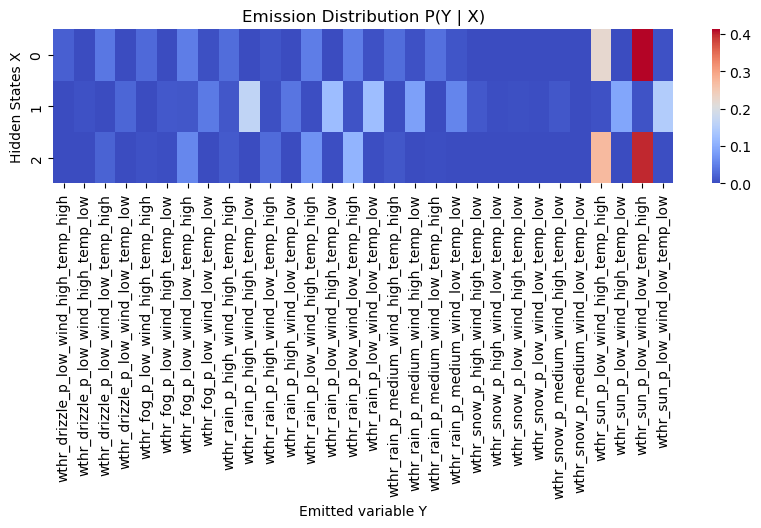

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
ax = sns.heatmap(emission_distribution, cmap='coolwarm', cbar=True)

# Set the title and axis labels
plt.title("Emission Distribution P(Y | X)")
plt.xlabel("Emitted variable Y")
plt.ylabel("Hidden States X")
# Replace y-ticks (encoded 0,1,2) with inverse label names
ax.set_xticks(np.arange(emission_distribution.shape[1]) + 0.5)
ax.set_xticklabels(
    [inverse_label_encoding(i) for i in range(emission_distribution.shape[1])],
    rotation=90
)

plt.show()

In [83]:
[inverse_label_encoding(i) for i in range(30)]

['wthr_drizzle_p_low_wind_high_temp_high',
 'wthr_drizzle_p_low_wind_high_temp_low',
 'wthr_drizzle_p_low_wind_low_temp_high',
 'wthr_drizzle_p_low_wind_low_temp_low',
 'wthr_fog_p_low_wind_high_temp_high',
 'wthr_fog_p_low_wind_high_temp_low',
 'wthr_fog_p_low_wind_low_temp_high',
 'wthr_fog_p_low_wind_low_temp_low',
 'wthr_rain_p_high_wind_high_temp_high',
 'wthr_rain_p_high_wind_high_temp_low',
 'wthr_rain_p_high_wind_low_temp_high',
 'wthr_rain_p_high_wind_low_temp_low',
 'wthr_rain_p_low_wind_high_temp_high',
 'wthr_rain_p_low_wind_high_temp_low',
 'wthr_rain_p_low_wind_low_temp_high',
 'wthr_rain_p_low_wind_low_temp_low',
 'wthr_rain_p_medium_wind_high_temp_high',
 'wthr_rain_p_medium_wind_high_temp_low',
 'wthr_rain_p_medium_wind_low_temp_high',
 'wthr_rain_p_medium_wind_low_temp_low',
 'wthr_snow_p_high_wind_high_temp_low',
 'wthr_snow_p_high_wind_low_temp_low',
 'wthr_snow_p_low_wind_high_temp_low',
 'wthr_snow_p_low_wind_low_temp_low',
 'wthr_snow_p_medium_wind_high_temp_low'

In [84]:
model.transmat_

array([[1.60625961e-01, 2.49922239e-02, 8.14381816e-01],
       [2.66026267e-02, 9.73290980e-01, 1.06393394e-04],
       [7.04506708e-01, 3.63953541e-02, 2.59097938e-01]])

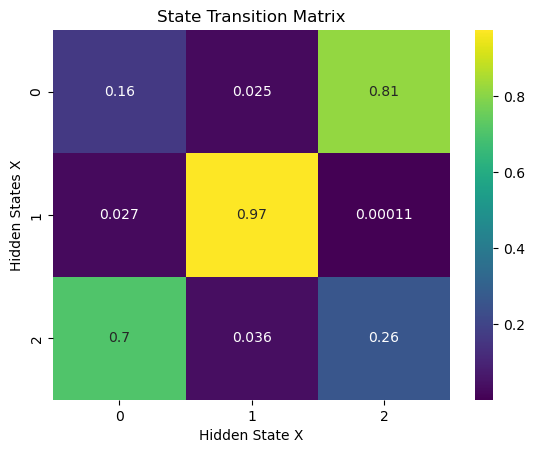

In [89]:
ax2=sns.heatmap(pd.DataFrame(model.transmat_),annot=True,cmap='viridis')
plt.title("State Transition Matrix")
plt.xlabel("Hidden State X")
plt.ylabel("Hidden States X")
plt.show()

In [91]:
model.startprob_

array([2.97532548e-20, 1.00000000e+00, 3.73261009e-42])

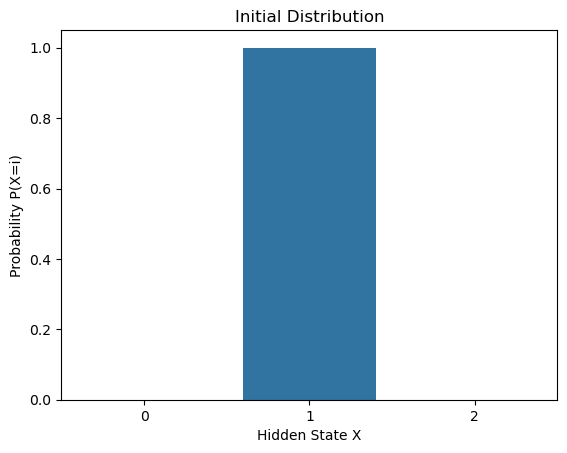

In [93]:
ax3=sns.barplot(data=model.startprob_)
plt.title("Initial Distribution")
plt.xlabel("Hidden State X")
plt.ylabel("Probability P(X=i)")
plt.show()